In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[15,6]

df = pd.read_csv('corona.csv')
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [2]:
df.shape

(43451, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43451 entries, 0 to 43450
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ind_ID               43451 non-null  int64 
 1   Test_date            43451 non-null  object
 2   Cough_symptoms       43431 non-null  object
 3   Fever                43431 non-null  object
 4   Sore_throat          43449 non-null  object
 5   Shortness_of_breath  43449 non-null  object
 6   Headache             43449 non-null  object
 7   Corona               43450 non-null  object
 8   Age_60_above         38938 non-null  object
 9   Sex                  28861 non-null  object
 10  Known_contact        43450 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.6+ MB


In [4]:
(df.isnull().sum()/df.shape[0])*100

,0
Ind_ID,0.000000
Test_date,0.000000
Cough_symptoms,0.046029
Fever,0.046029
Sore_throat,0.004603
Shortness_of_breath,0.004603
Headache,0.004603
Corona,0.002301
Age_60_above,10.386412
Sex,33.578053


In [5]:
df.nunique()

,0
Ind_ID,43451
Test_date,17
Cough_symptoms,2
Fever,2
Sore_throat,2
Shortness_of_breath,2
Headache,2
Corona,3
Age_60_above,2
Sex,2


In [6]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [7]:
for i in ['Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact']:
    print("The unique values in {} is: \n{}".format(i,df[i].unique()))
    print("-"*100)

The unique values in Cough_symptoms is: 
[True False nan]
----------------------------------------------------------------------------------------------------
The unique values in Fever is: 
[False True nan]
----------------------------------------------------------------------------------------------------
The unique values in Sore_throat is: 
[True False nan]
----------------------------------------------------------------------------------------------------
The unique values in Shortness_of_breath is: 
[False True nan]
----------------------------------------------------------------------------------------------------
The unique values in Headache is: 
[False True nan]
----------------------------------------------------------------------------------------------------
The unique values in Corona is: 
['negative' 'positive' 'other' nan]
----------------------------------------------------------------------------------------------------
The unique values in Age_60_above is: 
[nan 'No'

In [8]:
# df = df.drop(['Age_60_above','Ind_ID'],axis=1)
df = df.drop(['Ind_ID','Test_date'],axis=1)
df.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,True,False,True,False,False,negative,NaN,NaN,Abroad
1,False,True,False,False,False,positive,NaN,NaN,Abroad
2,False,True,False,False,False,positive,NaN,NaN,Abroad
3,True,False,False,False,False,negative,NaN,NaN,Abroad
4,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [9]:
# Drop rows where 'Corona' is 'other' or any NaN value exists
df = df.dropna()  # Drop rows with NaN values
df = df[df['Corona'] != 'other']  # Remove rows where 'Corona' is 'other'

# Display the cleaned DataFrame
df.head()


,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,True,False,False,False,False,negative,No,male,Abroad
13728,True,False,False,False,False,negative,No,female,Abroad
13730,True,True,False,False,False,positive,Yes,female,Other
13734,False,False,False,False,False,negative,No,male,Other
13735,False,False,False,False,False,negative,No,female,Other


In [10]:
df.head(20)

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,True,False,False,False,False,negative,No,male,Abroad
13728,True,False,False,False,False,negative,No,female,Abroad
13730,True,True,False,False,False,positive,Yes,female,Other
13734,False,False,False,False,False,negative,No,male,Other
13735,False,False,False,False,False,negative,No,female,Other
13736,False,False,False,False,False,negative,Yes,male,Other
13737,False,False,False,False,False,negative,Yes,male,Other
13738,False,False,False,False,False,negative,No,female,Other
13739,False,False,False,False,False,negative,No,female,Other
13740,False,False,False,False,False,negative,Yes,male,Other


In [11]:
for i in ['Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Sex',
       'Known_contact','Age_60_above']:
    print("The unique values in {} is: \n{}".format(i,df[i].unique()))
    print("-"*100)

The unique values in Cough_symptoms is: 
[True False]
----------------------------------------------------------------------------------------------------
The unique values in Fever is: 
[False True]
----------------------------------------------------------------------------------------------------
The unique values in Sore_throat is: 
[False True]
----------------------------------------------------------------------------------------------------
The unique values in Shortness_of_breath is: 
[False True]
----------------------------------------------------------------------------------------------------
The unique values in Headache is: 
[False True]
----------------------------------------------------------------------------------------------------
The unique values in Corona is: 
['negative' 'positive']
----------------------------------------------------------------------------------------------------
The unique values in Sex is: 
['male' 'female']
--------------------------------

In [12]:
(df.isnull().sum()/df.shape[0])*100

,0
Cough_symptoms,0.0
Fever,0.0
Sore_throat,0.0
Shortness_of_breath,0.0
Headache,0.0
Corona,0.0
Age_60_above,0.0
Sex,0.0
Known_contact,0.0


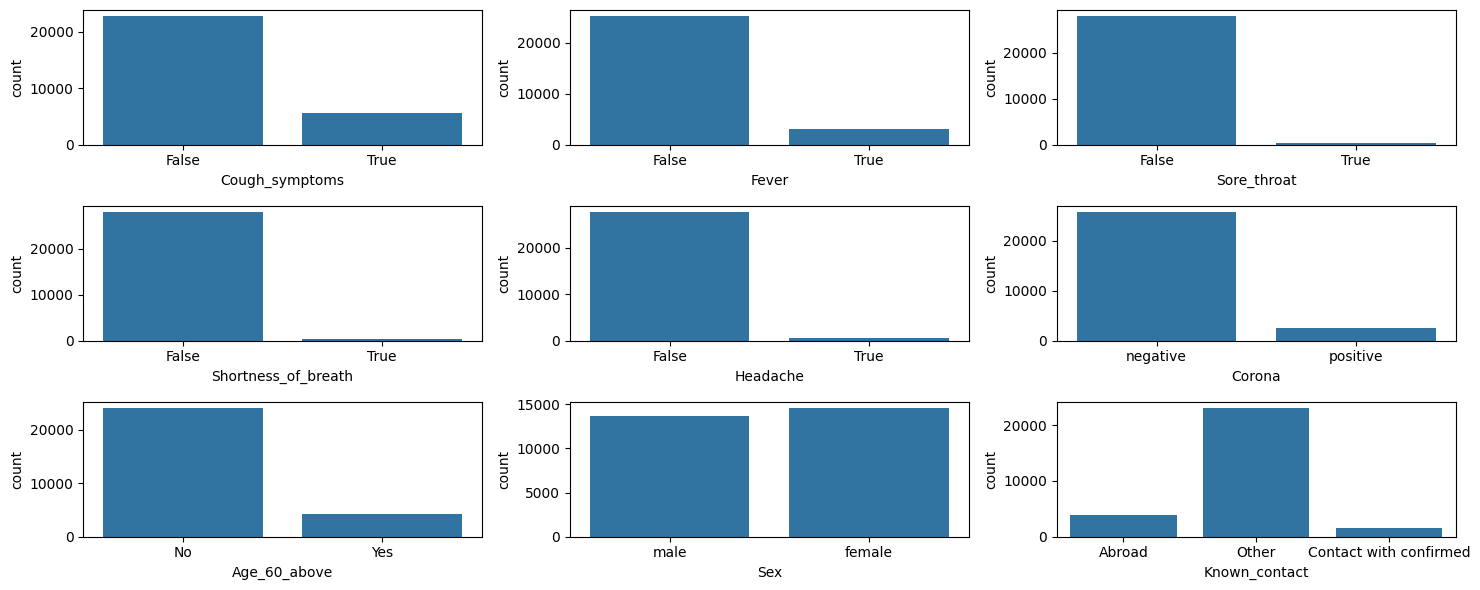

In [13]:
r=3
c=3
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    sns.countplot(x=i,data=df)
    it+=1
plt.tight_layout()
plt.show()

In [14]:
df.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,True,False,False,False,False,negative,No,male,Abroad
13728,True,False,False,False,False,negative,No,female,Abroad
13730,True,True,False,False,False,positive,Yes,female,Other
13734,False,False,False,False,False,negative,No,male,Other
13735,False,False,False,False,False,negative,No,female,Other


In [15]:
(df.isnull().sum()/df.shape[0])*100

,0
Cough_symptoms,0.0
Fever,0.0
Sore_throat,0.0
Shortness_of_breath,0.0
Headache,0.0
Corona,0.0
Age_60_above,0.0
Sex,0.0
Known_contact,0.0


In [16]:
from sklearn.preprocessing import LabelEncoder
import joblib
import pandas as pd

# 需要编码的列名
columns_to_encode = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
                     'Headache', 'Corona', 'Age_60_above', 'Sex', 'Known_contact']

# 创建 model/covid 文件夹，如果它不存在
import os
os.makedirs('model/covid', exist_ok=True)

# 为每列创建一个LabelEncoder对象，并单独保存
for col in columns_to_encode:
    le = LabelEncoder()  # 为每列创建一个新的LabelEncoder对象
    # 确保列中的值是字符串类型
    df[col] = df[col].astype(str)
    le.fit(df[col])  # 学习该列的映射关系
    df[col] = le.transform(df[col])  # 对列进行转换

    # 保存每个LabelEncoder到指定文件夹
    joblib.dump(le, f'model/covid/LabelEncoder_{col}.pkl')

# 保存转换后的DataFrame（编码后的数据）
# df.to_csv("encoded_data.csv", index=False)


In [17]:
df.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,1,0,0,0,0,0,0,1,0
13728,1,0,0,0,0,0,0,0,0
13730,1,1,0,0,0,1,1,0,2
13734,0,0,0,0,0,0,0,1,2
13735,0,0,0,0,0,0,0,0,2


In [18]:
# for i in ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']:
#     df[i] = df[i].replace({True:1,False:0})

In [19]:
# df.head()

In [20]:
# df = pd.get_dummies(df,columns=['Sex'],drop_first=True,dtype=int)
# df.head()

In [21]:
df['Corona'].value_counts()

,count
Corona,
0,25738
1,2551


In [22]:
df['Known_contact'].value_counts()

,count
Known_contact,
2,22998
0,3787
1,1504


In [23]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# for i in ['Corona','Known_contact']:
#     df[i] = le.fit_transform(df[i])

# df.head()

In [24]:
# y = df['Corona']
# x = df.drop('Corona', axis=1)

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Initialize the RandomForestClassifier
# rf = RandomForestClassifier()
# rf_model = rf.fit(x, y)  # Train on the entire dataset

# # Predictions on the entire dataset
# y_pred = rf_model.predict(x)

# # Metrics
# print("Overall accuracy is", accuracy_score(y, y_pred))
# print("Overall recall is", recall_score(y, y_pred))
# print("Overall precision is", precision_score(y, y_pred))
# print("Overall f1_score is", f1_score(y, y_pred))


In [25]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

# Define your features and target
y = df['Corona']
x = df.drop('Corona', axis=1)

# Initialize classifiers
rf = RandomForestClassifier()
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000)  # To avoid convergence warnings
xg = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

# Train each model on the entire dataset
rf_model = rf.fit(x, y)
dt_model = dt.fit(x, y)
lr_model = lr.fit(x, y)
xg_model = xg.fit(x, y)

# Predictions for each model
y_pred_rf = rf_model.predict(x)
y_pred_dt = dt_model.predict(x)
y_pred_lr = lr_model.predict(x)
y_pred_xg = xg_model.predict(x)

# Define a function to calculate all metrics and store in a dictionary
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

# Calculate metrics for each model
rf_metrics = get_metrics(y, y_pred_rf)
dt_metrics = get_metrics(y, y_pred_dt)
lr_metrics = get_metrics(y, y_pred_lr)
xg_metrics = get_metrics(y, y_pred_xg)

# Organize metrics into a DataFrame for easy comparison (vertical format)
comparison_df = pd.DataFrame({
    "Model": ["Random Forest", "Decision Tree", "Logistic Regression", "XGBoost"],
    "Accuracy": [rf_metrics["Accuracy"], dt_metrics["Accuracy"], lr_metrics["Accuracy"], xg_metrics["Accuracy"]],
    "Recall": [rf_metrics["Recall"], dt_metrics["Recall"], lr_metrics["Recall"], xg_metrics["Recall"]],
    "Precision": [rf_metrics["Precision"], dt_metrics["Precision"], lr_metrics["Precision"], xg_metrics["Precision"]],
    "F1 Score": [rf_metrics["F1 Score"], dt_metrics["F1 Score"], lr_metrics["F1 Score"], xg_metrics["F1 Score"]]
})

# Set 'Model' as index for a better vertical display
comparison_df.set_index("Model", inplace=True)

# Display the comparison table
print(comparison_df)


                     Accuracy    Recall  Precision  F1 Score
Model                                                       
Random Forest        0.959666  0.692278   0.832234  0.755831
Decision Tree        0.959666  0.688358   0.835395  0.754782
Logistic Regression  0.943724  0.428067   0.891429  0.578390
XGBoost              0.959596  0.695806   0.828665  0.756446


In [26]:
# import joblib
# from sklearn.preprocessing import LabelEncoder

# # Create two LabelEncoder objects
# le_corona = LabelEncoder()
# le_known_contact = LabelEncoder()

# # Fit the LabelEncoders on the respective columns
# le_corona.fit(df['Corona'])
# le_known_contact.fit(df['Known_contact'])

# # Bundle them into a dictionary or tuple
# encoders = {
#     'Corona': le_corona,
#     'Known_contact': le_known_contact
# }

# # Save the encoders dictionary to a single .pkl file
# joblib.dump(encoders, 'corona_label_encoders.pkl')

# print("Label encoders saved successfully.")

# Save the XGBoost model to a file
joblib.dump(xg_model, 'covid19_xgboost.pkl')
print("covid19_xgboost model saved successfully.")


covid19_xgboost model saved successfully.


In [27]:
df.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,1,0,0,0,0,0,0,1,0
13728,1,0,0,0,0,0,0,0,0
13730,1,1,0,0,0,1,1,0,2
13734,0,0,0,0,0,0,0,1,2
13735,0,0,0,0,0,0,0,0,2


In [28]:
# Also save the full preprocessed dataframe if needed
# df.to_csv('corona_preprocessed_data.csv', index=False)